# Atelier : Maîtrisez NumPy et Matplotlib 🚀

Plongeons dans l'univers des données ! 🌌

Le fichier `toy_star_dataset.csv` contient une liste d'étoiles avec diverses charactéristiques. Nous analyser ces données de diverses manières afin de se pratiquer à utiliser les packages `NumPy`, `pandas`,  et `Matplotlib`. 

Importer les packages

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Ouvrir le fichier

In [3]:
df = pd.read_csv("toy_star_dataset.csv")

In [4]:
df

,Name,Distance,Mass,Radius,Luminosity,Metallicity,Number of planets,Temperature,Age
0,Star-001,462.155143,0.797193,0.780156,0.481624,1.177652,0,5258.166624,7.891362
1,Star-002,790.142766,0.502984,0.586089,0.082524,0.980435,1,4451.743114,12.648079
2,Star-003,1837.623923,0.833593,0.784564,0.538793,0.782709,4,5407.866680,11.165323
3,Star-004,209.181044,3.327159,2.345356,79.543175,0.808324,1,9944.620805,10.906133
4,Star-005,474.304530,2.256452,1.929498,17.907106,0.813272,3,8477.526407,7.963629
...,...,...,...,...,...,...,...,...,...
195,Star-196,1223.672333,1.770751,1.536442,6.979723,0.997915,1,7623.292814,9.362660
196,Star-197,899.363166,0.895869,0.951576,0.626622,1.013905,2,5537.595992,8.034225
197,Star-198,482.432928,0.963826,0.913217,0.840260,0.814035,8,6058.548079,8.481708
198,Star-199,1653.264112,0.963853,0.962561,0.746710,0.883944,5,5275.293006,5.447037


In [5]:
print(df.keys)

<bound method NDFrame.keys of          Name     Distance      Mass    Radius  Luminosity  Metallicity  \
0    Star-001   462.155143  0.797193  0.780156    0.481624     1.177652   
1    Star-002   790.142766  0.502984  0.586089    0.082524     0.980435   
2    Star-003  1837.623923  0.833593  0.784564    0.538793     0.782709   
3    Star-004   209.181044  3.327159  2.345356   79.543175     0.808324   
4    Star-005   474.304530  2.256452  1.929498   17.907106     0.813272   
..        ...          ...       ...       ...         ...          ...   
195  Star-196  1223.672333  1.770751  1.536442    6.979723     0.997915   
196  Star-197   899.363166  0.895869  0.951576    0.626622     1.013905   
197  Star-198   482.432928  0.963826  0.913217    0.840260     0.814035   
198  Star-199  1653.264112  0.963853  0.962561    0.746710     0.883944   
199  Star-200   897.899054  1.165826  1.084907    1.933076     1.031157   

     Number of planets  Temperature        Age  
0                   

Relation between the mass and temperature of a star

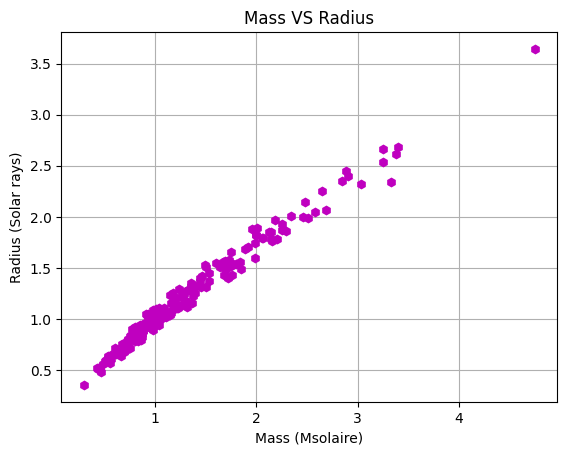

In [40]:
pt = plt.plot(df["Mass"], df["Radius"],"mh")
plt.show
plt.title("Mass VS Radius")
plt.xlabel("Mass (Msolaire)")
plt.ylabel("Radius (Solar rays)")
maxTemp = np.max(df["Radius"])
plt.grid()


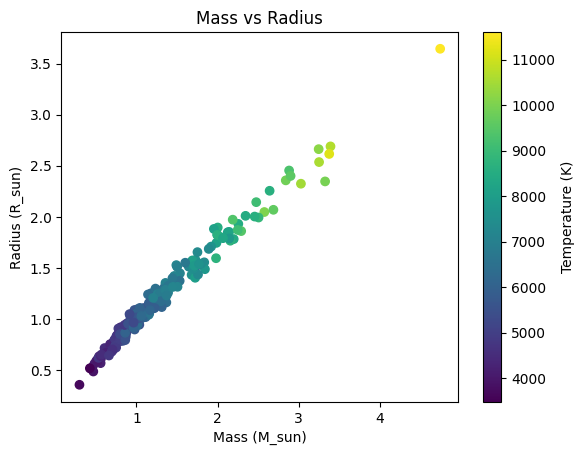

In [38]:
sc = plt.scatter(df['Mass'], df['Radius'], c=df['Temperature'], cmap='viridis')
plt.colorbar(sc, label='Temperature (K)')#plt.plot(df['Mass'], df['Radius'], 'o')
plt.xlabel('Mass (M_sun)')
plt.ylabel('Radius (R_sun)')
plt.title('Mass vs Radius')
plt.show()

Histogramme for the number of planets discovered

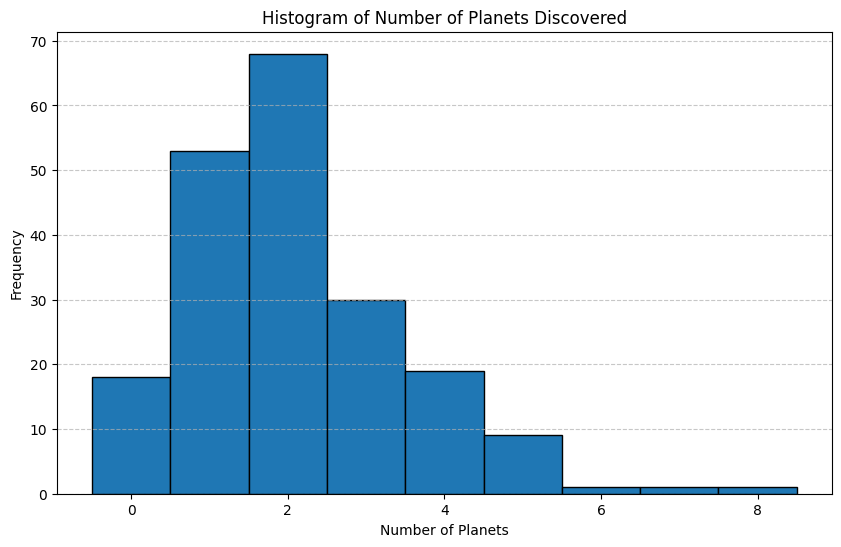

In [44]:
plt.figure(figsize=(10, 6))
plt.hist(df['Number of planets'], bins=np.arange(df['Number of planets'].min() - 0.5, df['Number of planets'].max() + 1.5, 1), edgecolor='black')
plt.xlabel('Number of Planets')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Planets Discovered')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Exclude from the dataframe, the stars with the following conditions:

    1. $$T > 6000K$$
    2. $$M > 2M_sol$$
    3. $$R > 2R_sol$$

In [65]:
indices_too_hot = df["Temperature"] > 6000
indices_too_massive = df["Mass"] > 2
indices_too_big = df["Radius"] > 2
df_filtered = df[~(indices_too_hot | indices_too_massive | indices_too_big)]
len(df_filtered)

95

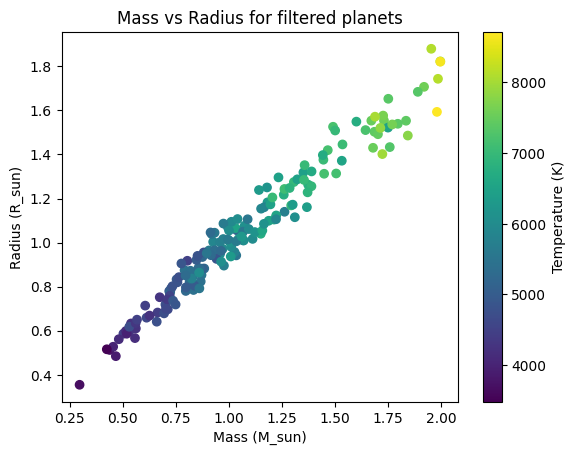

In [61]:
sc = plt.scatter(df_filtered['Mass'], df_filtered['Radius'], c=df_filtered['Temperature'], cmap='viridis')
plt.colorbar(sc, label='Temperature (K)')#plt.plot(df_filtered['Mass'], df_filtered['Radius'], 'o')
plt.xlabel('Mass (M_sun)')
plt.ylabel('Radius (R_sun)')
plt.title('Mass vs Radius for filtered planets')
plt.show()

Calculate the density of stars

In [69]:
M_sun = 2e30 #from M_sun to kg
R_sun = 7e8 #from R_sun to m

Mass = df["Mass"] * M_sun
Radius = df["Radius"] * R_sun
Volume = (4/3) * np.pi * ((Radius)**3)
Density = Mass/Volume

Density

0      2337.044644
1      3477.841648
2      2402.787031
3       359.000231
4       437.260876
          ...     
195     679.604461
196    1447.309838
197    1761.667433
198    1504.436449
199    1270.875446
Length: 200, dtype: float64

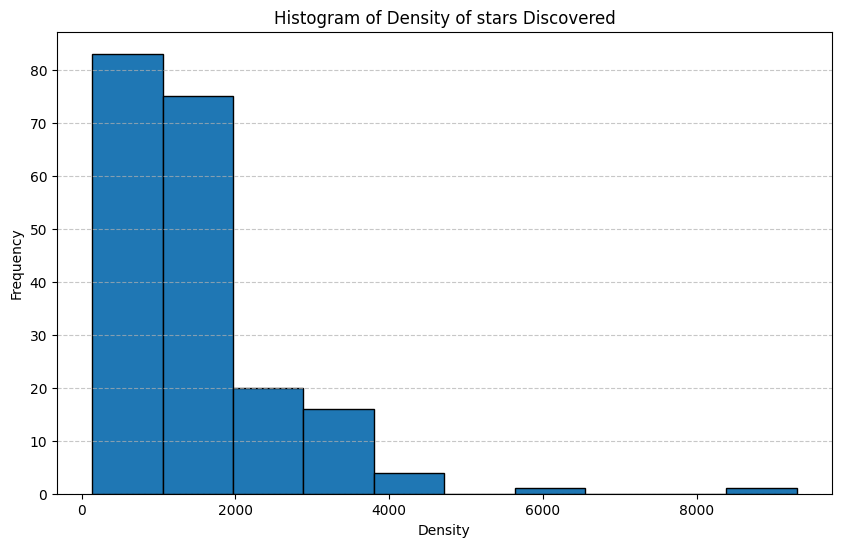

In [71]:
plt.figure(figsize=(10, 6))
plt.hist(Density, edgecolor='black')
plt.xlabel('Density')
plt.ylabel('Frequency')
plt.title('Histogram of Density of stars Discovered')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()